In [40]:
# Import Statements 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
# Reading in the CSV file from Kaggle (Credits to Paola Mazza) into a Pandas Data Frame
players_df = pd.read_csv("players.csv")
print(players_df.head())

   id                          name  now_cost position     team      web_name  \
0   1               Folarin Balogun        44      FWD  Arsenal       Balogun   
1   2           Cédric Alves Soares        39      DEF  Arsenal        Cédric   
2   3                Mohamed Elneny        44      MID  Arsenal      M.Elneny   
3   4         Fábio Ferreira Vieira        54      MID  Arsenal  Fábio Vieira   
4   5  Gabriel dos Santos Magalhães        49      DEF  Arsenal       Gabriel   

   transfers_in_event  influence_rank_type                   news_added  \
0                   0                   61  2023-08-31T08:55:15.272751Z   
1                 433                  173                          NaN   
2                  54                  215  2023-12-12T22:30:08.433665Z   
3                   5                  134  2023-12-07T12:00:08.489004Z   
4              104278                   42  2023-09-30T23:00:07.672676Z   

   ict_index_rank_type  ...  now_cost_rank_type  ict_index  no

In [42]:
# Split the dataset based on values in the 'Position' column
defenders_df = players_df[players_df['position'] == 'DEF']
midfielders_df = players_df[players_df['position'] == 'MID']
forwards_df = players_df[players_df['position'] == 'FWD']
keepers_df = players_df[players_df['position'] == 'GKP']

In [43]:
# Preprocess the data within the Pandas Data Frame
def preprocess(position_df):
    processed_df = position_df.copy()
    processed_df = processed_df.drop_duplicates()
    
    return processed_df

# Defenders Data
processed_defenders_df = preprocess(defenders_df)

# Midfielders Data
processed_midfielders_df = preprocess(midfielders_df)

# Forwards Data
processed_forwards_df = preprocess(forwards_df)

# Keepers Data
processed_keepers_df = preprocess(keepers_df)

In [44]:
def standardize_data(df):
    # Separate the target column
    target_column = 'total_points'
    y = df[target_column]
    X = df.drop(columns=[target_column])

    # Standardize the feature columns
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    
    # Convert the standardized array back to a DataFrame
    X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
    
    # Concatenate the standardized features with the target column
    standardized_df = pd.concat([X_standardized_df, y], axis=1)
    
    return standardized_df


# Defenders Data
processed_defenders_df_s = preprocess(processed_defenders_df)

# Midfielders Data
processed_midfielders_df_s = preprocess(processed_midfielders_df)

# Forwards Data
processed_forwards_df_s = preprocess(processed_forwards_df)

# Keepers Data
processed_keepers_df_s = preprocess(processed_keepers_df)


In [45]:
# Find the Top 5 Features for Predicting Players Score
def find_top_features(processed_df):
    copy_df = processed_df.copy()
    X = copy_df.drop(columns=['total_points'])
    y = processed_df['total_points']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    # Only need the top N features
    #print(f"Mean Squared Error: {mse}")

    feature_importances = model.feature_importances_
    top_features = X.columns[feature_importances.argsort()[::-1][:5]]
    
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_features_display = feature_importance_df.head(5)
    print("Top Features:")
    print(top_features_display)

    selected_features_df = players_df[top_features]
    print(selected_features_df.head())

    plt.figure(figsize=(10, 6))
    plt.barh(top_features_display['Feature'], top_features_display['Importance'])
    plt.xlabel('Importance')
    plt.title('Top Feature Importances')
    plt.show()
    
    return top_features

Top Features:
                Feature  Importance
4   ict_index_rank_type    0.348031
41       ict_index_rank    0.263959
30                  bps    0.137234
11       influence_rank    0.090093
3   influence_rank_type    0.063284
   ict_index_rank_type  ict_index_rank  bps  influence_rank  \
0                   63             628    0             623   
1                  172             493    0             487   
2                  214             470   12             473   
3                  139             300   62             318   
4                   47             172  259             110   

   influence_rank_type  
0                   61  
1                  173  
2                  215  
3                  134  
4                   42  


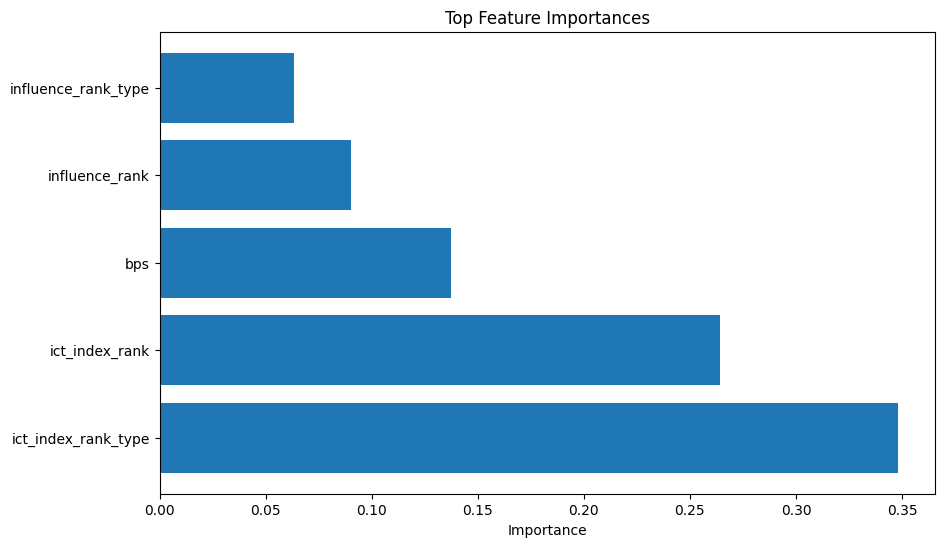

In [46]:
# Find the Top 5 Features for Predicting Midfielders Score
midfielder_features = find_top_features(processed_midfielders_df_s[processed_midfielders_df_s.select_dtypes(include=['int']).columns])

Top Features:
                      Feature  Importance
30                        bps    0.365912
11             influence_rank    0.090872
37                    minutes    0.076037
3         influence_rank_type    0.075893
20  points_per_game_rank_type    0.067822
   bps  influence_rank  minutes  influence_rank_type  \
0    0             623        0                   61   
1    0             487        0                  173   
2   12             473        1                  215   
3   62             318      236                  134   
4  259             110     1284                   42   

   points_per_game_rank_type  
0                         66  
1                        170  
2                         30  
3                         92  
4                         24  


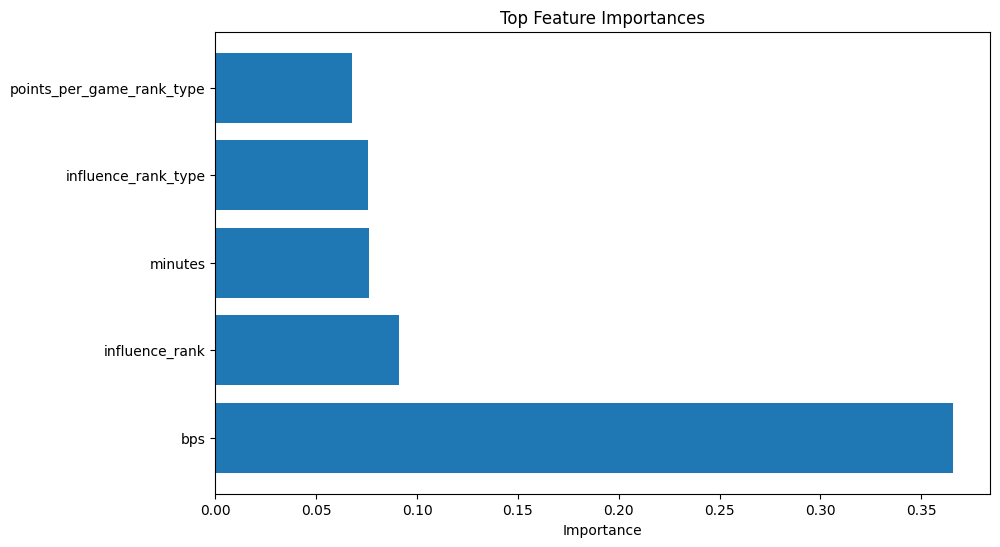

In [47]:
# Find the Top 5 Features for Predicting Forwards Score
forward_features = find_top_features(processed_forwards_df_s[processed_forwards_df_s.select_dtypes(include=['int']).columns])

Top Features:
                Feature  Importance
16               starts    0.181233
37              minutes    0.175915
30                  bps    0.136484
3   influence_rank_type    0.077331
31                saves    0.076284
   starts  minutes  bps  influence_rank_type  saves
0       0        0    0                   61      0
1       0        0    0                  173      0
2       0        1   12                  215      0
3       2      236   62                  134      0
4      14     1284  259                   42      0


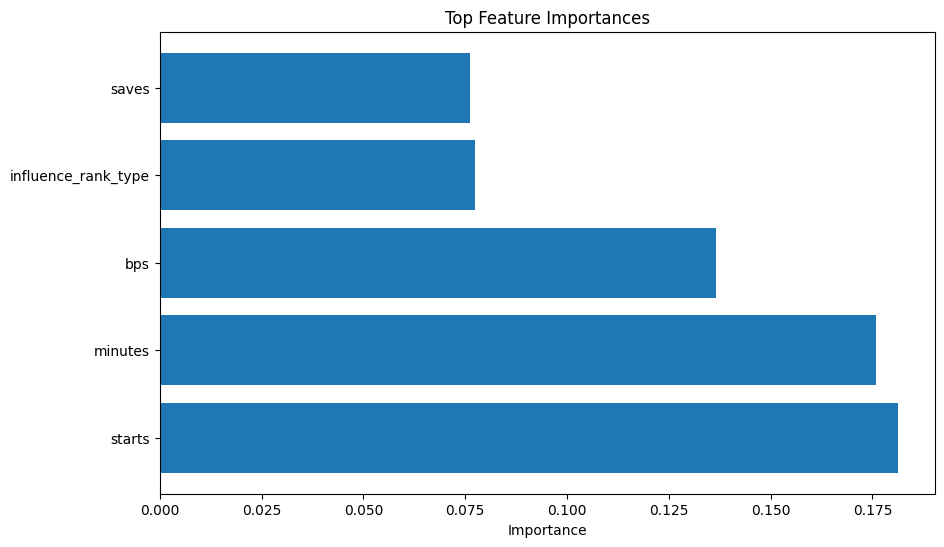

In [48]:
# Find the Top 5 Features for Predicting Keepers Score
keeper_features = find_top_features(processed_keepers_df_s[processed_keepers_df_s.select_dtypes(include=['int']).columns])

Top Features:
                      Feature  Importance
30                        bps    0.819851
25               clean_sheets    0.067556
12       points_per_game_rank    0.031924
20  points_per_game_rank_type    0.022145
22                      bonus    0.009629
   bps  clean_sheets  points_per_game_rank  points_per_game_rank_type  bonus
0    0             0                   635                         66      0
1    0             0                   499                        170      0
2   12             0                    55                         30      0
3   62             1                   209                         92      0
4  259             5                   100                         24      4


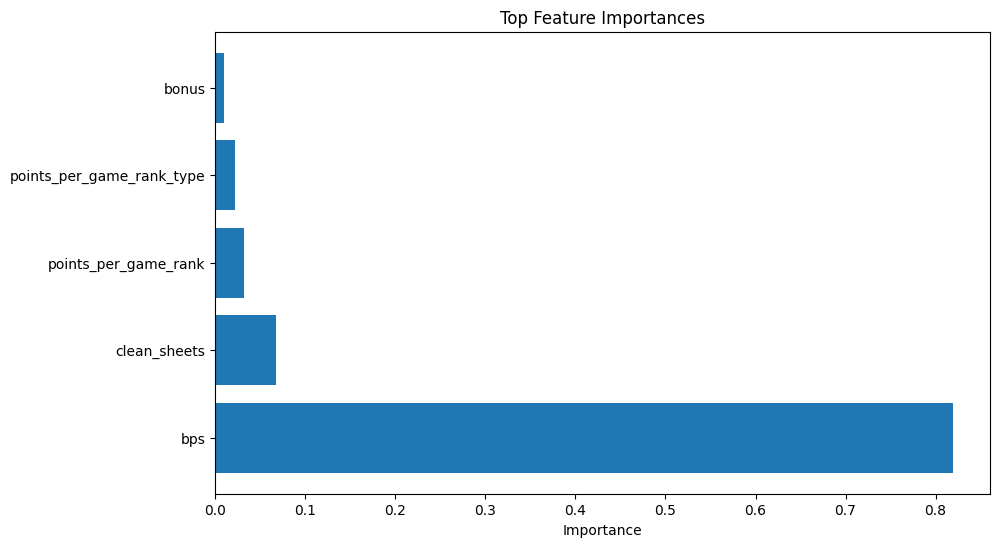

In [49]:
# Find the Top 5 Features for Predicting Defenders Score
defender_features = find_top_features(processed_defenders_df_s[processed_defenders_df_s.select_dtypes(include=['int']).columns])